In this notebook we explore with Logistic Regression Classifiers

We see that using the features PAY_1, AVE_PAY, and UNPAID_MONTHS a logistic regression model can be useful, but it is useless on the other features because it guesses everyone pays their bill duly.  Just using PAY_1 might be the most useful, by a small amount.

C=1 seems to give the same metrics as any other value for C

This performs slightly worse than the random forest classifier

## Importing Packages and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import recall_score, accuracy_score

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('clean_data_2.csv')

## Important shortcuts and helper functions

In [7]:
features1=['SEX', 
           'EDUCATION', 
           'MARRIAGE', 
           'PAY_1',
           'PAY_AMT1',
           'AGE_BY10', 
           'AVE_PAY', 
           'AGE/LIM', 
           'AVE_BILL_AMT',
           'AVE_BILL_AMT/LIM', 
           'AVE_PAY_AMT',
           'AVE_PAY_AMT/LIM',  
           'AVE_PAY/BILL', 
           'UNPAID_MONTHS']

## Splitting the data

In [8]:
train, val = train_test_split(df,
                              test_size=0.1,
                              stratify=df["Y"],
                              shuffle=True,
                              random_state=123)

## Logistic regression

In [9]:
def logreg(j, splits=5, features=features1):
    '''creates a logistic regression model on every feature in features
    outputs an array of accuracy and recall for C = 1-j
    features is the list of features it will go through
    splits is the number of kfold splits'''
    
    accs=np.zeros((j,splits))
    recs = np.zeros((j,splits))
    
    kfold=StratifiedKFold(n_splits=splits,
                    shuffle=True,
                    random_state=123)
    
    for i in range(j):
        x=0
        for train_index, test_index in kfold.split(train[features], train['Y']):

            # make logistic regression model with with C=i+1
            logreg = LogisticRegression(C=i+1)
            logreg.fit(
                    train.iloc[train_index][features],
                    train.iloc[train_index]['Y']
                    )
            pred=logreg.predict(train.iloc[test_index][features]
                            )

            # add metrics to the tables
            accs[i,x]=accuracy_score(train.iloc[test_index]['Y'], pred)
            recs[i,x]=recall_score(train.iloc[test_index]['Y'], pred, zero_division=0)
            x=x+1
    
    return([accs, recs])
        
    

In [10]:
metrics_lr=logreg(10)

C:\Users\sheri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
metrics_lr

[array([[0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81407407, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185],
        [0.77944444, 0.78055556, 0.80333333, 0.81648148, 0.80685185]]),
 array([[0.00753138, 0.01004184, 0.27135678, 0.30485762, 0.28559464],
        [0.00753138, 0.01004184, 0.27135678, 0.30485762, 0.28559464],
        [0.00753138, 0.01004184, 0.27135678, 0.30485762, 0.28559464],
        [0.00753138, 0.01004184, 0.27135678, 0.27805695, 0.28559464],
        [0.0075313

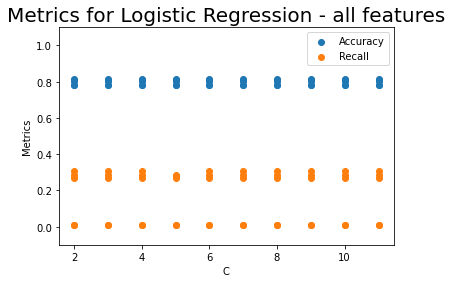

In [12]:
#plt.figure(figsize=(8,6))

plt.scatter(5*[2,3,4,5,6,7,8,9,10,11], 
            np.transpose(metrics_lr[0]).reshape(1,-1),
           label='Accuracy')

plt.scatter(5*[2,3,4,5,6,7,8,9,10,11], 
            np.transpose(metrics_lr[1]).reshape(1,-1),
           label='Recall')

#plt.scatter(range(2,12), np.mean(metrics[1], axis=1), label='Average')

plt.title('Metrics for Logistic Regression - all features', fontsize=20)
plt.xlabel('C')
plt.ylabel('Metrics')
plt.ylim(-0.1,1.1)

plt.legend()

plt.show()

In [22]:
np.mean(metrics_lr[1][0])

0.17587645339669059

C doesn't seem to matter, so we'll just use 1

In [13]:
def logreg_2(splits=5, features=features1):
    '''creates a logistic regression model on one feature, for each feature in features
    features is the list of features it will go through
    splits is the number of kfold splits'''
    
    accs=np.zeros((len(features),splits))
    recs = np.zeros((len(features),splits))
    
    kfold=StratifiedKFold(n_splits=splits,
                    shuffle=True,
                    random_state=123)
    
    for i in range(len(features)):
        x=0
        for train_index, test_index in kfold.split(train[features], train['Y']):

            # make logistic regression model with with C=i+1
            logreg = LogisticRegression(C=1)
            logreg.fit(
                    train.iloc[train_index][[features[i]]],
                    train.iloc[train_index]['Y']
                    )
            pred=logreg.predict(train.iloc[test_index][[features[i]]]
                            )

            # add metrics to the tables
            accs[i,x]=accuracy_score(train.iloc[test_index]['Y'], pred)
            recs[i,x]=recall_score(train.iloc[test_index]['Y'], pred, zero_division=0)
            x=x+1
    
    return([accs, recs])
        
    

In [14]:
metrics_lr2=logreg_2()

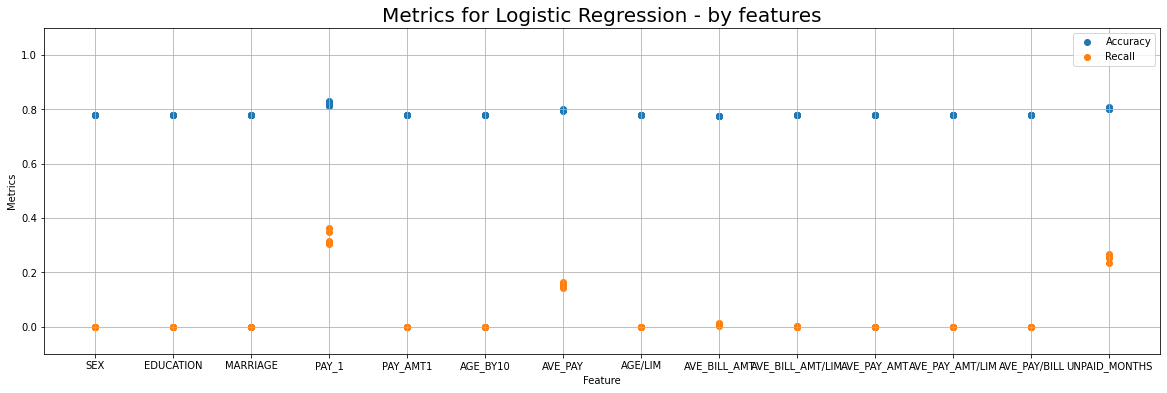

In [15]:
plt.figure(figsize=(20,6))

plt.scatter(5*features1, 
            np.transpose(metrics_lr2[0]).reshape(1,-1),
           label='Accuracy')

plt.scatter(5*features1, 
            np.transpose(metrics_lr2[1]).reshape(1,-1),
           label='Recall')

#plt.scatter(range(2,12), np.mean(metrics[1], axis=1), label='Average')

plt.title('Metrics for Logistic Regression - by features', fontsize=20)
plt.xlabel('Feature')
plt.ylabel('Metrics')
plt.ylim(-0.1,1.1)

plt.legend()
plt.grid()

plt.show()

So a Logistic regression model basically guesses everybody will pay duly most of the time, but on features PAY_1, AVE_PAY, and UNPAID_MONTHS it actually does some work.

In [16]:
(train['Y'].value_counts()[0])/len(train)

0.7788148148148148

In [17]:
metrics_lr3=logreg(1,features=['PAY_1','AVE_PAY','UNPAID_MONTHS'])

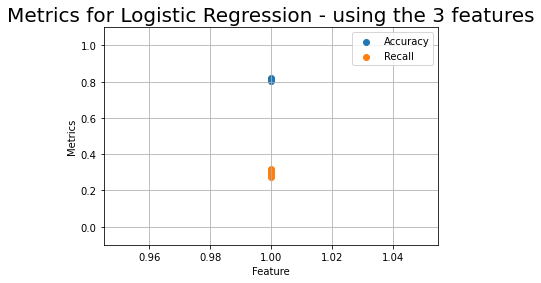

In [18]:
#plt.figure(figsize=(20,6))

plt.scatter(5*[1], 
            np.transpose(metrics_lr3[0]).reshape(1,-1),
           label='Accuracy')

plt.scatter(5*[1], 
            np.transpose(metrics_lr3[1]).reshape(1,-1),
           label='Recall')

#plt.scatter(range(2,12), np.mean(metrics[1], axis=1), label='Average')

plt.title('Metrics for Logistic Regression - using the 3 features', fontsize=20)
plt.xlabel('Feature')
plt.ylabel('Metrics')
plt.ylim(-0.1,1.1)

plt.grid()

plt.legend()

plt.show()

In [25]:
np.mean(metrics_lr3[1])

0.29521498706923743

## testing against validation data

In [9]:
LR1=LogisticRegression(C=1)

In [10]:
LR1.fit(train[features1], train['Y'])

pred1=LR1.predict(val[features1])

In [11]:
print('Accuracy score: ' + str(np.round(accuracy_score(val['Y'], pred1),4)))
print('Recall score: ' + str(np.round(recall_score(val['Y'], pred1),4)))

Accuracy score: 0.8023
Recall score: 0.2515


In [12]:
LR2=LogisticRegression(C=1)

In [13]:
LR2.fit(train[['PAY_1','AVE_PAY','UNPAID_MONTHS']], train['Y'])
pred2=LR2.predict(val[['PAY_1','AVE_PAY','UNPAID_MONTHS']])

In [14]:
print('Accuracy score: ' + str(np.round(accuracy_score(val['Y'], pred2),4)))
print('Recall score: ' + str(np.round(recall_score(val['Y'], pred2),4)))

Accuracy score: 0.803
Recall score: 0.256
